In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from time import time
from sklearn import metrics

In [3]:
faves = pd.read_csv('../Assets/A/faves_SVD.csv')

In [4]:
# Faves contains unwanted 'Unnamed: 0 column from index
faves = faves.drop('Unnamed: 0', axis=1)

In [5]:
faves = faves.as_matrix()

In [7]:
faves.shape

(53951, 3)

In [6]:
km = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=True)  #Come back reevaluate n_clusters and verbose

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(faves)
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=True)
Init 1/1 with method: k-means++
Inertia for init 1/1: 30860480421.429508
Minibatch iteration 1/5400: mean batch inertia: 28609166.090708, ewa inertia: 28609166.090708 
Minibatch iteration 2/5400: mean batch inertia: 28673916.971801, ewa inertia: 28611566.405102 
Minibatch iteration 3/5400: mean batch inertia: 27161202.263942, ewa inertia: 28557801.423594 
Minibatch iteration 4/5400: mean batch inertia: 29084063.606337, ewa inertia: 28577309.956465 
Minibatch iteration 5/5400: mean batch inertia: 29193628.558737, ewa inertia: 28600156.879741 
Minibatch iteration 6/5400: mean batch inertia: 27214701.171266, ewa inertia: 28548798.053062 
Minibatch iteration 7/5400: mean batch inertia: 29098442.407528, ewa inertia: 28569173.36

//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 53950 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 53950 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 53950 + 1) instead
  0, n_samples - 1, self.batch_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 53950 + 1) instead
  0, n_samples - 1, self.batch_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 53950 + 1) instead
  0, n_samples - 1, self.batch_size)
//anacon

In [7]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(faves, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.588


In [8]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [9]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([17947, 19176, 16828]))

In [ ]:
# How do I evaluate these clusters?
# Then attempt try with different scalers
# Adjust K value
# Graph three components IN 3-D!

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
type(km.labels_)

numpy.ndarray

In [12]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [13]:
estimators = {'k_means_3': km}
X = faves

In [107]:
#np.ravel(labels.astype(np.float)).shape

(53951,)

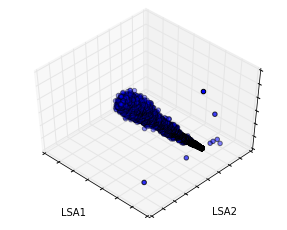

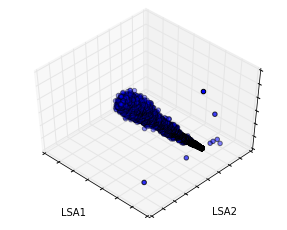

In [14]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    # est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2]) #c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('LSA1')
    ax.set_ylabel('LSA2')
    ax.set_zlabel('LSA3')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

'''
for label in km.labels_:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(),
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
'''
ax.scatter(X[:, 0], X[:, 1], X[:, 2])    # c=y

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('LSA1')
ax.set_ylabel('LSA2')
ax.set_zlabel('LSA3')
plt.show()

### Try 2-d plot

In [15]:
labels_km = km.labels_
centroids = km.cluster_centers_

In [16]:
fig = pylab.figure(figsize=(12,9))

signal_axes = fig.add_subplot(211)
signal_axes.plot(xs,rawsignal)

fft_axes = fig.add_subplot(212)
fft_axes.set_title("FFT")
fft_axes.set_autoscaley_on(False)
fft_axes.set_ylim([0,1000])
fft = scipy.fft(rawsignal)
fft_axes.plot(abs(fft))

pylab.show()

NameError: name 'pylab' is not defined

In [17]:
import seaborn as sns

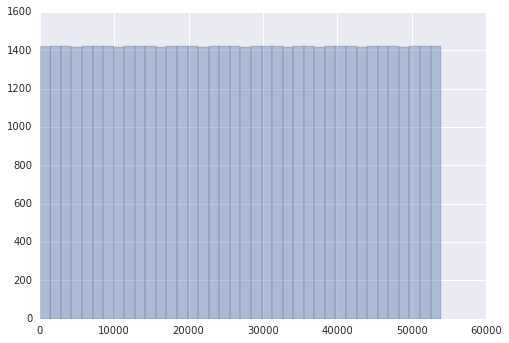

In [18]:
sns.distplot(X[:,0], kde=False);

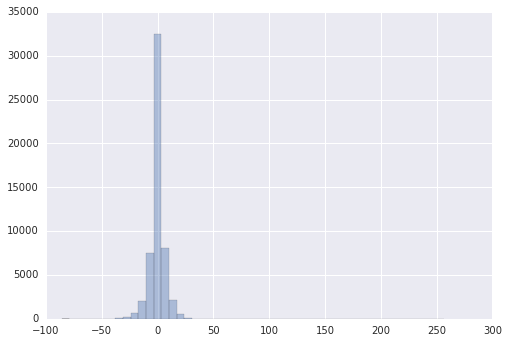

In [19]:
sns.distplot(X[:,1], kde=False);

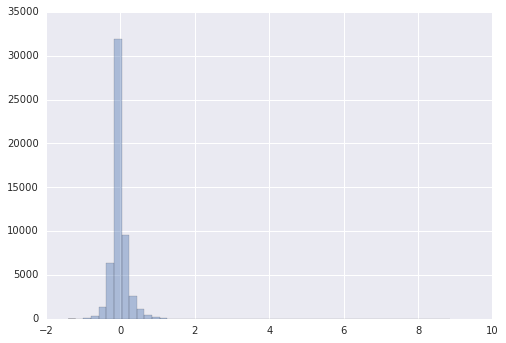

In [20]:
sns.distplot(X[:,2], kde=False);

In [66]:
max(X[:,1])

256.80283920700003

In [27]:
plt.style.use('seaborn-bright')

In [28]:
labels_km

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

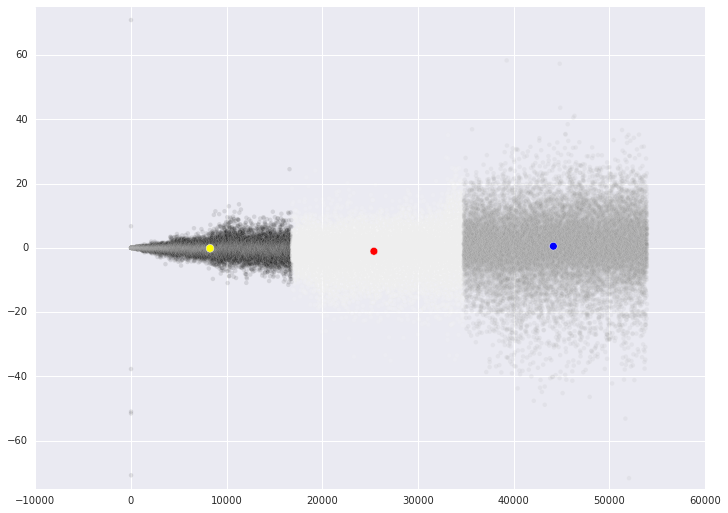

In [26]:
fig = plt.figure(figsize=(12,19))

ax = fig.add_subplot(212)
ax.set_autoscaley_on(False)
ax.set_ylim([-75, 75])

plt.scatter(X[:,0], X[:,1], c = labels_km, alpha=.1)
plt.scatter(centroids[:,0], centroids[:,1], c = ["red","blue", "yellow"], s = 60 )

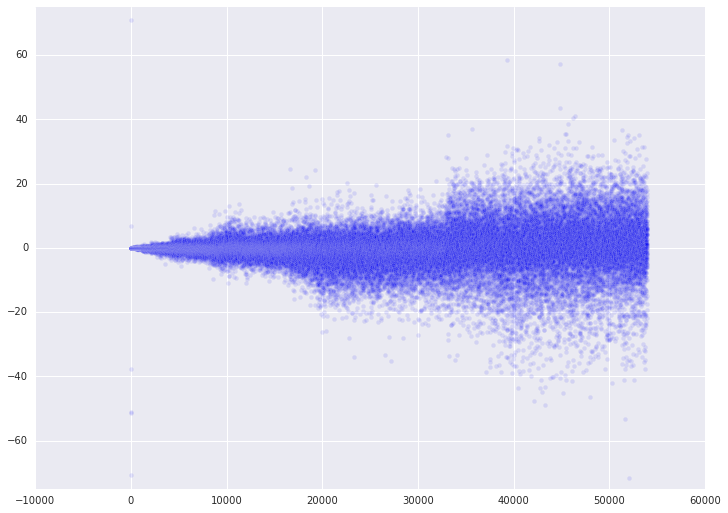

In [50]:
# Clustering does not seem very meaningful

fig = plt.figure(figsize=(12,19))

ax = fig.add_subplot(212)
ax.set_autoscaley_on(False)
ax.set_ylim([-75, 75])

plt.scatter(X[:,0], X[:,1], alpha=.1)

### Try scaling SVD prior to clustering

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X = StandardScaler().fit_transform(faves)

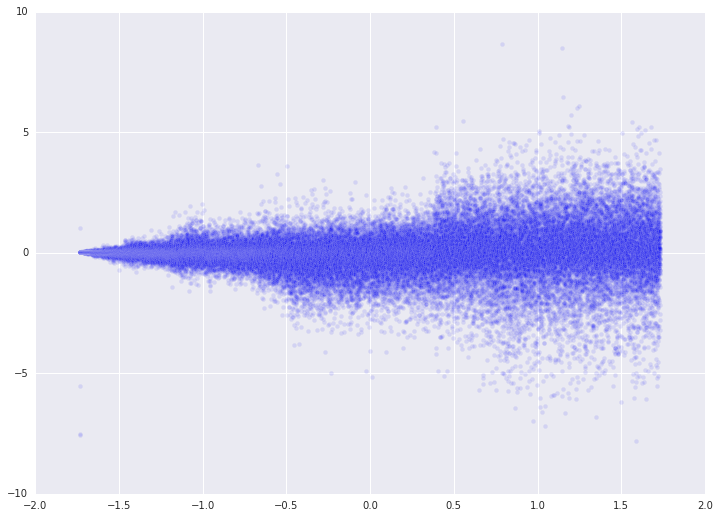

In [64]:
fig = plt.figure(figsize=(12,19))

ax = fig.add_subplot(212)
ax.set_autoscaley_on(False)
ax.set_ylim([-10, 10])

plt.scatter(X[:,0], X[:,1], alpha=.1)

### Now try with long essay instead of books, bands and movies

In [39]:
essay = pd.read_csv('../Assets/A/long_essay_SVD.csv')

In [41]:
essay = essay.drop("Unnamed: 0", axis=1)

In [42]:
essay.shape

(57809, 100)

In [43]:
essay = essay.as_matrix()

In [44]:
type(essay)

numpy.ndarray

(-0.1, 0.1)

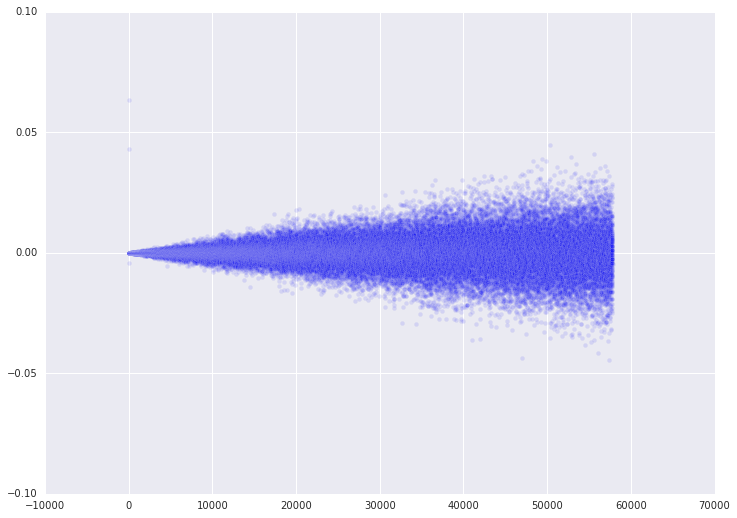

In [49]:
fig = plt.figure(figsize=(12,19))

ax = fig.add_subplot(212)
plt.scatter(essay[:,0], essay[:,1], alpha=.1)
ax.set_autoscaley_on(False)
ax.set_ylim([-.1, .1])